# Bling Fire Tokenizer Demo
In this notebook we illustrate how to use Bling Fire tokenizer. We build a simple token-based classifier for Stack Overflow classification set and measure accuracy of the classifier with Bling Fire tokenizer vs the built in.


## Basic Usage

In [1]:
from blingfire import *

text = "In order to login to Café use pi@1.2.1.2. Split the data into train/test with a test size of 20% then use recurrent model (use LSTM or GRU)."

# tokenize text without sentence boundaries
ws = text_to_words(text).split(' ')
print("All tokens: ", ws)

# first break text to sentences and then break each sentence to words
sents = text_to_sentences(text).split('\n')
for sent in sents:
    print("Sentence text: " + sent)
    print("Tokenized sentence: " + text_to_words(sent))


All tokens:  ['In', 'order', 'to', 'login', 'to', 'Café', 'use', 'pi', '@', '1', '.', '2', '.', '1', '.', '2', '.', 'Split', 'the', 'data', 'into', 'train', '/', 'test', 'with', 'a', 'test', 'size', 'of', '20', '%', 'then', 'use', 'recurrent', 'model', '(', 'use', 'LSTM', 'or', 'GRU', ')', '.']
Sentence text: In order to login to Café use pi@1.2.1.2.
Tokenized sentence: In order to login to Café use pi @ 1 . 2 . 1 . 2 .
Sentence text: Split the data into train/test with a test size of 20% then use recurrent model (use LSTM or GRU).
Tokenized sentence: Split the data into train / test with a test size of 20 % then use recurrent model ( use LSTM or GRU ) .


## Get the Data Set Ready

### Download the Data Set, if needed

In [2]:
import requests
import os.path

def download_file(filename, url):
    """
    Download an URL to a file
    """
    with open(filename, 'wb') as fout:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        # Write response data to file
        for block in response.iter_content(4096):
            fout.write(block)

def download_if_not_exists(filename, url):
    """
    Download a URL to a file if the file
    does not exist already.
    Returns
    -------
    True if the file was downloaded,
    False if it already existed
    """
    if not os.path.exists(filename):
        download_file(filename, url)
        return True
    return False

In [3]:
INPUT_DATA = './stack-overflow-data.csv'
url = 'https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv'
download_if_not_exists(filename, url)

False

In [4]:
!ls -l stack-overflow-data.csv

-rwxrwxrwx 1 root root 44319561 Mar 28 21:49 stack-overflow-data.csv


### Read the data with Pandas

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

CSV_COLUMN_NAMES = ["post", "tags"]
TEST_SIZE = 0.2

# Parse the local CSV file.
all_data = pd.read_csv(filepath_or_buffer=INPUT_DATA,
                    names=CSV_COLUMN_NAMES,  # list of column names
                    header=1  # ignore the first row of the CSV file.
                    )
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 2 columns):
post    39999 non-null object
tags    39999 non-null object
dtypes: object(2)
memory usage: 625.1+ KB


### Split into the Train and Test

In [6]:
train, test = train_test_split(all_data, test_size=TEST_SIZE)

train_x, train_y = train.pop('post'), train.pop('tags')
test_x, test_y = test.pop('post'), test.pop('tags')

all_texts = all_data.pop('post')

print('Train data length ' + str(len(train_x)))
print('Train labels length ' + str(len(train_y)))

Train data length 31999
Train labels length 31999


In [7]:
print(train_x.head())
print(train_y.head())


31866    how to multiply a number after each 60 minute ...
12131    priorityqueue returning incorrect ordering for...
35742    how can i create a method so that the below co...
22475    long.tryparse and negative values  i m writing...
24315    how to add space between two divs in html   i ...
Name: post, dtype: object
31866    javascript
12131          java
35742            c#
22475            c#
24315          html
Name: tags, dtype: object


In [8]:
def texts2ids(vocab, series):
    new_series = []
    for line in series:
        word = line.strip()
        if not (word in vocab):
            vocab[word] = len(vocab)
        new_series.append(vocab[word])
    return new_series

In [9]:
label_vocab = {}

train_y_ids = texts2ids(label_vocab, train_y)
print(label_vocab)
print(train_y_ids[0:100])

test_y_ids = texts2ids(label_vocab, test_y)
print(label_vocab)
print(test_y_ids[0:100])

{'javascript': 0, 'objective-c': 8, 'c': 16, 'asp.net': 6, 'jquery': 19, 'ios': 14, 'java': 1, 'python': 13, 'mysql': 15, 'c++': 4, 'angularjs': 18, 'iphone': 9, 'c#': 2, 'css': 11, 'html': 3, 'sql': 12, 'android': 17, '.net': 10, 'ruby-on-rails': 7, 'php': 5}
[0, 1, 2, 2, 3, 4, 5, 6, 5, 7, 8, 3, 5, 7, 9, 10, 9, 11, 5, 9, 12, 5, 9, 8, 3, 9, 13, 3, 10, 14, 0, 9, 15, 5, 1, 6, 9, 6, 9, 11, 9, 14, 7, 8, 4, 16, 7, 14, 2, 5, 10, 13, 17, 0, 10, 10, 18, 11, 11, 8, 5, 2, 3, 8, 16, 4, 6, 7, 13, 9, 19, 10, 1, 11, 16, 1, 4, 13, 8, 16, 2, 1, 8, 6, 7, 4, 14, 5, 14, 0, 2, 3, 5, 14, 7, 6, 16, 18, 17, 6]
{'javascript': 0, 'objective-c': 8, 'c': 16, 'asp.net': 6, 'jquery': 19, 'ios': 14, 'java': 1, 'python': 13, 'mysql': 15, 'c++': 4, 'angularjs': 18, 'iphone': 9, 'c#': 2, 'css': 11, 'html': 3, 'sql': 12, 'android': 17, '.net': 10, 'ruby-on-rails': 7, 'php': 5}
[0, 16, 8, 19, 18, 0, 19, 11, 18, 0, 2, 6, 4, 14, 6, 13, 6, 1, 1, 17, 7, 3, 1, 5, 0, 0, 5, 13, 10, 1, 10, 5, 17, 15, 7, 12, 9, 6, 8, 16, 17, 11,

## First Let's use built in tokenizer

In [10]:
# we will use all text to collect top 1000 most frequent words
vectorizer_all = TfidfVectorizer(max_features=1000)
vectorizer_all.fit_transform(all_texts)

# we will use this vectorizer with precomputed vocabulary of 1000 words
vectorizer = TfidfVectorizer(vocabulary=vectorizer_all.vocabulary_)

In [11]:
train_x_tfidf = vectorizer.fit_transform(train_x).todense()
test_x_tfidf = vectorizer.fit_transform(test_x).todense()

import numpy as np
from sklearn import preprocessing

train_y_onehot = preprocessing.OneHotEncoder().fit_transform(np.array(train_y_ids).reshape(-1,1)).toarray()
test_y_onehot = preprocessing.OneHotEncoder().fit_transform(np.array(test_y_ids).reshape(-1,1)).toarray()

print(train_y_onehot.shape[1])

20


In [12]:
import tensorflow as tf

C = tf.feature_column
E = tf.estimator
D = tf.data
L = tf.keras.layers

model = tf.keras.models.Sequential()
model.add(L.Dense(1000, input_shape=train_x_tfidf.shape[1:]))
model.add(L.BatchNormalization())
model.add(L.Activation('tanh'))
model.add(L.Dropout(0.5))
model.add(L.Dense(100))
model.add(L.BatchNormalization())
model.add(L.Activation('tanh'))
model.add(L.Dropout(0.5))
model.add(L.Dense(train_y_onehot.shape[1], activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.0001), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
batch_normalization (BatchNo (None, 1000)              4000      
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
__________

In [13]:
h = model.fit(train_x_tfidf, train_y_onehot, epochs=8, validation_split=0.1)

Train on 28799 samples, validate on 3200 samples
Epoch 1/8
28799/28799 [==============================] - 13s 439us/step - loss: 1.9058 - acc: 0.4548 - val_loss: 0.9705 - val_acc: 0.7406
Epoch 2/8
28799/28799 [==============================] - 4s 146us/step - loss: 1.1049 - acc: 0.6775 - val_loss: 0.8033 - val_acc: 0.7712
Epoch 3/8
28799/28799 [==============================] - 4s 148us/step - loss: 0.9139 - acc: 0.7304 - val_loss: 0.7512 - val_acc: 0.7834
Epoch 4/8
28799/28799 [==============================] - 4s 148us/step - loss: 0.8149 - acc: 0.7575 - val_loss: 0.7232 - val_acc: 0.7869
Epoch 5/8
28799/28799 [==============================] - 4s 147us/step - loss: 0.7544 - acc: 0.7737 - val_loss: 0.7097 - val_acc: 0.7887
Epoch 6/8
28799/28799 [==============================] - 4s 147us/step - loss: 0.7115 - acc: 0.7854 - val_loss: 0.7020 - val_acc: 0.7863
Epoch 7/8
28799/28799 [==============================] - 4s 148us/step - loss: 0.6834 - acc: 0.7904 - val_loss: 0.6946 - val_acc

In [14]:
model.evaluate(train_x_tfidf, train_y_onehot)

31999/31999 [==============================] - 1s 41us/step


[0.46620027987434476, 0.8610269070703569]

In [15]:
loss, acc = model.evaluate(test_x_tfidf, test_y_onehot, batch_size=32)
acc

8000/8000 [==============================] - 0s 41us/step


0.791

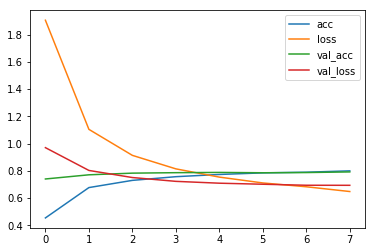

In [16]:
pd.DataFrame(h.history).plot()

## Now let's use Bling Fire

In [17]:
def my_tokenizer(s):
    return text_to_words(s).split(' ')

vectorizer_all = TfidfVectorizer(tokenizer=my_tokenizer, max_features=1000)
vectorizer_all.fit_transform(all_texts)

vectorizer = TfidfVectorizer(tokenizer=my_tokenizer, vocabulary=vectorizer_all.vocabulary_)

In [18]:
train_x_tfidf = vectorizer.fit_transform(train_x).todense()
test_x_tfidf = vectorizer.fit_transform(test_x).todense()

import numpy as np
from sklearn import preprocessing

train_y_onehot = preprocessing.OneHotEncoder().fit_transform(np.array(train_y_ids).reshape(-1,1)).toarray()
test_y_onehot = preprocessing.OneHotEncoder().fit_transform(np.array(test_y_ids).reshape(-1,1)).toarray()

print(train_y_onehot.shape[1])

20


In [19]:
model = tf.keras.models.Sequential()
model.add(L.Dense(1000, input_shape=train_x_tfidf.shape[1:]))
model.add(L.BatchNormalization())
model.add(L.Activation('tanh'))
model.add(L.Dropout(0.5))
model.add(L.Dense(100))
model.add(L.BatchNormalization())
model.add(L.Activation('tanh'))
model.add(L.Dropout(0.5))
model.add(L.Dense(train_y_onehot.shape[1], activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.0001), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1000)              4000      
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               100100    
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________

In [20]:
h = model.fit(train_x_tfidf, train_y_onehot, epochs=8, validation_split=0.1)

Train on 28799 samples, validate on 3200 samples
Epoch 1/8
28799/28799 [==============================] - 5s 171us/step - loss: 1.8345 - acc: 0.4695 - val_loss: 0.8957 - val_acc: 0.7606
Epoch 2/8
28799/28799 [==============================] - 4s 148us/step - loss: 1.0535 - acc: 0.6977 - val_loss: 0.7377 - val_acc: 0.7891
Epoch 3/8
28799/28799 [==============================] - 4s 147us/step - loss: 0.8592 - acc: 0.7475 - val_loss: 0.6831 - val_acc: 0.7994
Epoch 4/8
28799/28799 [==============================] - 4s 146us/step - loss: 0.7652 - acc: 0.7730 - val_loss: 0.6589 - val_acc: 0.8078
Epoch 5/8
28799/28799 [==============================] - 4s 149us/step - loss: 0.6935 - acc: 0.7915 - val_loss: 0.6430 - val_acc: 0.8128
Epoch 6/8
28799/28799 [==============================] - 4s 148us/step - loss: 0.6538 - acc: 0.8032 - val_loss: 0.6393 - val_acc: 0.8103
Epoch 7/8
28799/28799 [==============================] - 4s 147us/step - loss: 0.6226 - acc: 0.8105 - val_loss: 0.6348 - val_acc:

In [21]:
model.evaluate(train_x_tfidf, train_y_onehot)

31999/31999 [==============================] - 1s 42us/step


[0.4210543013810404, 0.8734335448075885]

In [22]:
loss, acc = model.evaluate(test_x_tfidf, test_y_onehot, batch_size=32)
acc

8000/8000 [==============================] - 0s 42us/step


0.813125

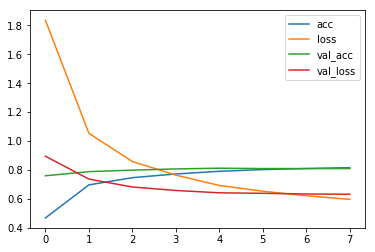

In [23]:
pd.DataFrame(h.history).plot()

## Conclusion

Classifier shows 79.1% accuracy with built in tokenizer and 81.3% with Bling Fire. So importance of the tokenization cannot be underestimated, even more the correctness and consistency of tokenization is important if model uses pre-trained embeddings.
